
# CODE TO PREDICT STOCK MARKET PRICE
# Dr. Ryan Ahmed @STEMplicity
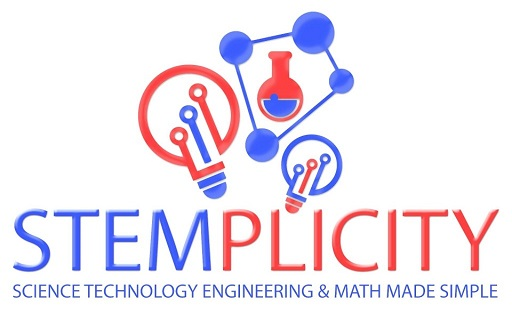



# PROBLEM STATEMENT

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [4]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# STEP #2: VISUALIZE DATASET

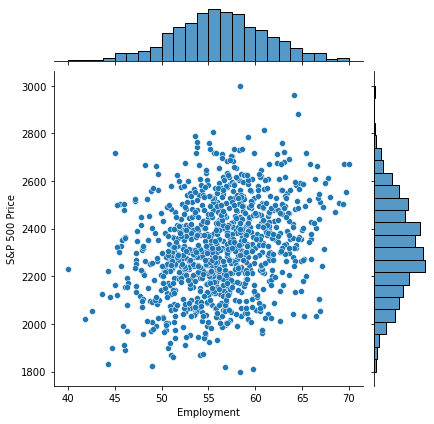

In [6]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

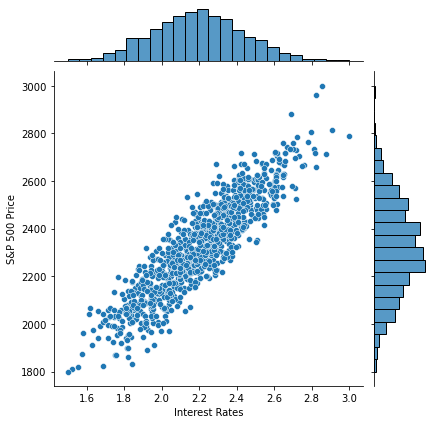

In [7]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

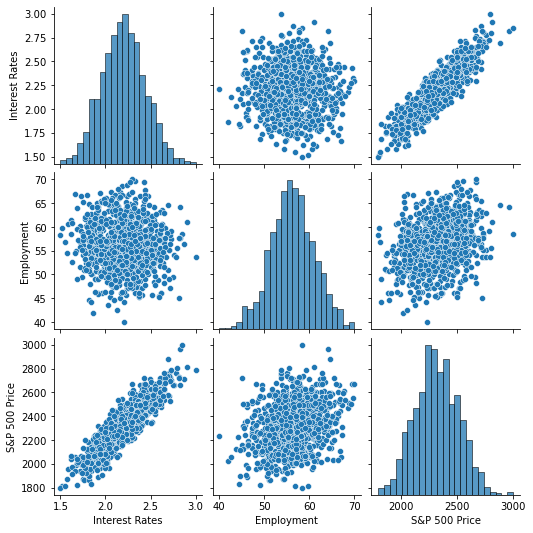

In [8]:
sns.pairplot(stock)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [9]:
y = stock ['S&P 500 Price']

In [10]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [11]:
X = stock[['Interest Rates', 'Employment']]

In [12]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [14]:
X_train

,Interest Rates,Employment
278,2.425351,58.691992
247,2.513982,52.634427
577,1.902075,56.294301
620,2.328508,65.101914
16,2.392425,60.573820
...,...,...
546,2.466072,53.818380
844,2.379713,56.883823
59,2.331762,51.206799
439,2.556872,53.249842


In [15]:
X_test

,Interest Rates,Employment
149,2.176974,58.151900
405,2.231418,55.432324
124,2.021398,55.260544
958,1.789873,62.636470
547,2.605130,55.624738
...,...,...
941,2.382676,52.455348
40,2.368019,52.153910
496,2.489980,55.154062
705,1.725399,59.043966


# STEP#4: TRAINING THE MODEL

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept = True)

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [732.33437784  12.74510143]
Linear Model Coefficients (b) -6.889848604484996


# STEP#5: EVALUATING THE MODEL 

In [20]:
y_predict = regressor.predict(X_test)
y_predict

array([2328.53491891, 2333.74479761, 2177.75055482, 2102.20397945,
       2609.87946385, 2402.62435562, 2193.41063482, 2409.61603025,
       2366.71203057, 2400.56863178, 2322.52580701, 2203.68550241,
       2296.71330075, 2214.6987594 , 2369.99720644, 2331.20440908,
       2797.71155868, 2120.63569664, 2017.65474624, 2365.52273475,
       2062.29323799, 2474.57238197, 2436.33644548, 2632.48413733,
       2422.77069084, 2172.37774857, 2584.32620711, 1834.95692861,
       2192.79833337, 2268.19527654, 2503.19052149, 2660.16634608,
       2400.02671012, 2520.10586788, 2091.3262457 , 2126.92804695,
       1989.04369095, 2239.68247831, 2360.96900611, 1999.80655539,
       2312.46862164, 2122.24618396, 2209.97061007, 2203.55835807,
       2511.76372111, 2106.37341576, 2246.66194223, 2069.1207197 ,
       2332.24055144, 1968.57331467, 2249.42070718, 2592.75986068,
       2334.63876838, 2555.37185862, 2293.70403417, 2480.31475888,
       2877.30185646, 2094.37150804, 2347.97086952, 2623.74777

In [21]:
y_test

149    2276.957169
405    2288.032975
124    2192.103402
958    2012.319387
547    2716.460755
          ...     
941    2488.765356
40     2395.449084
496    2535.149493
705    2066.719804
513    2274.612243
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

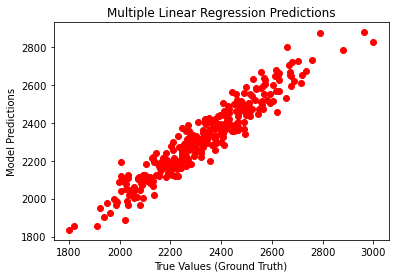

In [22]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [23]:
k = X_test.shape[1]
n = len(X_test)

In [24]:
n

300

In [25]:
k

2

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [27]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  60.256 
MSE = 3630.8072870939677 
MAE = 48.82208249646492 
R2 = 0.9112601487645968 
Adjusted R2 = 0.9106625740088029 
MAPE = 2.095110093867937
